In [2]:
#Import the required libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the file into a data frame
movie_budgets = pd.read_csv("/home/mungai/Downloads/dsc-phase-1-project-master/zippedData/tn.movie_budgets.csv") 
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
#get information about the data frame
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#Get the unique values in the movie column
k = pd.unique(movie_budgets['movie'])
len(k)

5698

2.0 Exploring data in the data frame

In [6]:
#create a function that takes the object data type and converts it to integer
def type_integer(dataframe,column):
    dataframe[column] = dataframe[column].str.replace(',','')
    dataframe[column] = dataframe[column].str.replace('$','')
    dataframe[column] = pd.to_numeric(dataframe[column])

    return dataframe[column]



In [7]:
#change the column worldwide gross to int64
type_integer(movie_budgets,'domestic_gross')

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: int64

In [8]:
#change the column the domestic gross to integer
type_integer(movie_budgets,"worldwide_gross")

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [9]:
#change the column production budget to integer
type_integer(movie_budgets,"production_budget")

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [10]:
#check the info in the dataframe
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [11]:
#create a column called profits to know the profits made in each movie
movie_budgets['profits'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [12]:
#check the added column in the dataframe
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [13]:
#display each movie with the profits made
movie_budgets[['movie','profits']]

,movie,profits
0,Avatar,2351345279
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747
...,...,...
5777,Red 11,-7000
5778,Following,234495
5779,Return to the Land of Wonders,-3662
5780,A Plague So Pleasant,-1400


In [14]:
#find the length of unique production budget 
production_budget = list(pd.unique(movie_budgets['production_budget']))
len(production_budget)

509

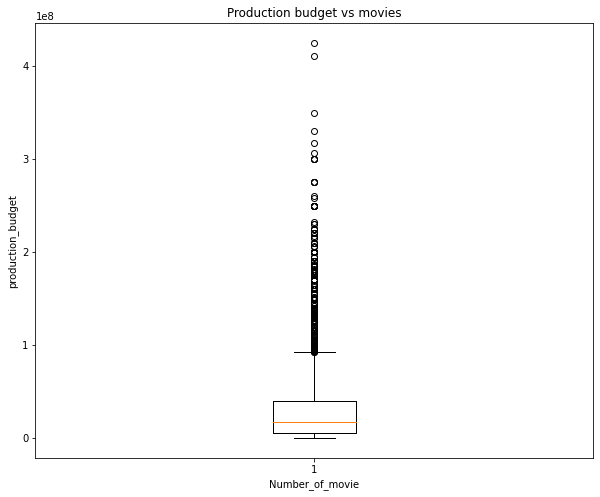

In [16]:
#show a distribution of the production budget of movies
Number_of_movies = movie_budgets.index
production_budget = movie_budgets['production_budget']
#Give a distribution of the figure size
plt.figure(figsize=(10,8))
#Give the plots to be used
plt.boxplot(movie_budgets['production_budget'])
#Give the title, and labels of the axis
plt.title('Production budget vs movies')
plt.xlabel('Number_of_movie')
plt.ylabel('production_budget')
 
# To show the plot
plt.show()

In [ ]:
###
"This shows that 40-100 movies had a budget of below 200million"
"About 20-40 movies had a budget of 200m-2.5m"
"Only two movies had a budget of over 400m"
"Most movies have a production budget of 200m"
###

In [32]:
#Plot a barchart of movies with the most common budget
mode_budget =movie_budgets['production_budget'].mode()
mode_budget

0    20000000
dtype: int64

In [18]:
#create a variable that hold production budget of 200m and below
within_budget = movie_budgets[movie_budgets['production_budget'] == 200000000]
within_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1042520711
44,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,1049102856,849102856
45,46,"Jun 17, 2016",Finding Dory,200000000,486295561,1021215193,821215193
46,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,868879522
47,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,1015392272
48,49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101,862316233,662316233
49,50,"Jun 30, 2004",Spider-Man 2,200000000,373524485,795110670,595110670
50,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,825491110


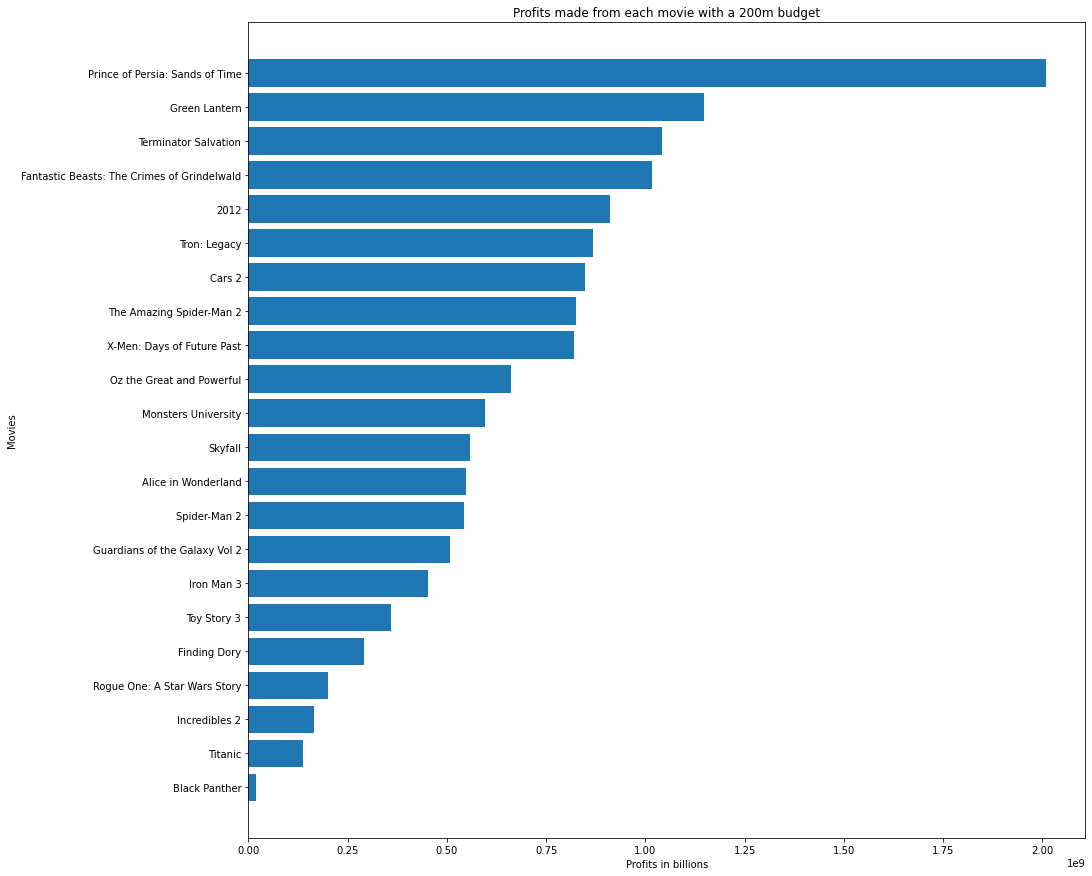

In [19]:
#plot a barchart to show which shows movies with budget of 200m 
profits =  within_budget['profits'].sort_values()
#Give a distribution of the figure size
plt.figure(figsize=(15,15))
#Give the plots to be used
plt.barh(within_budget['movie'],profits)

#Give the title, and labels of the axis
plt.title('Profits made from each movie with a 200m budget')
plt.xlabel('Profits in billions')
plt.ylabel('Movies')
#To show the plot
plt.show()


In [ ]:
###
"The movie with the most profit with a budget of 200m was prince of persia sands of time"
"Most movies made a profit of above 500m"

In [20]:
#films with budget below 200m 
below_budget1 = movie_budgets[movie_budgets['profits'] < 0 ]
below_budget = below_budget1[movie_budgets['production_budget'] > 100000000]
below_budget = below_budget.sort_values('profits')

<ipython-input-20-317ac41325c6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  below_budget = below_budget1[movie_budgets['production_budget'] > 100000000]


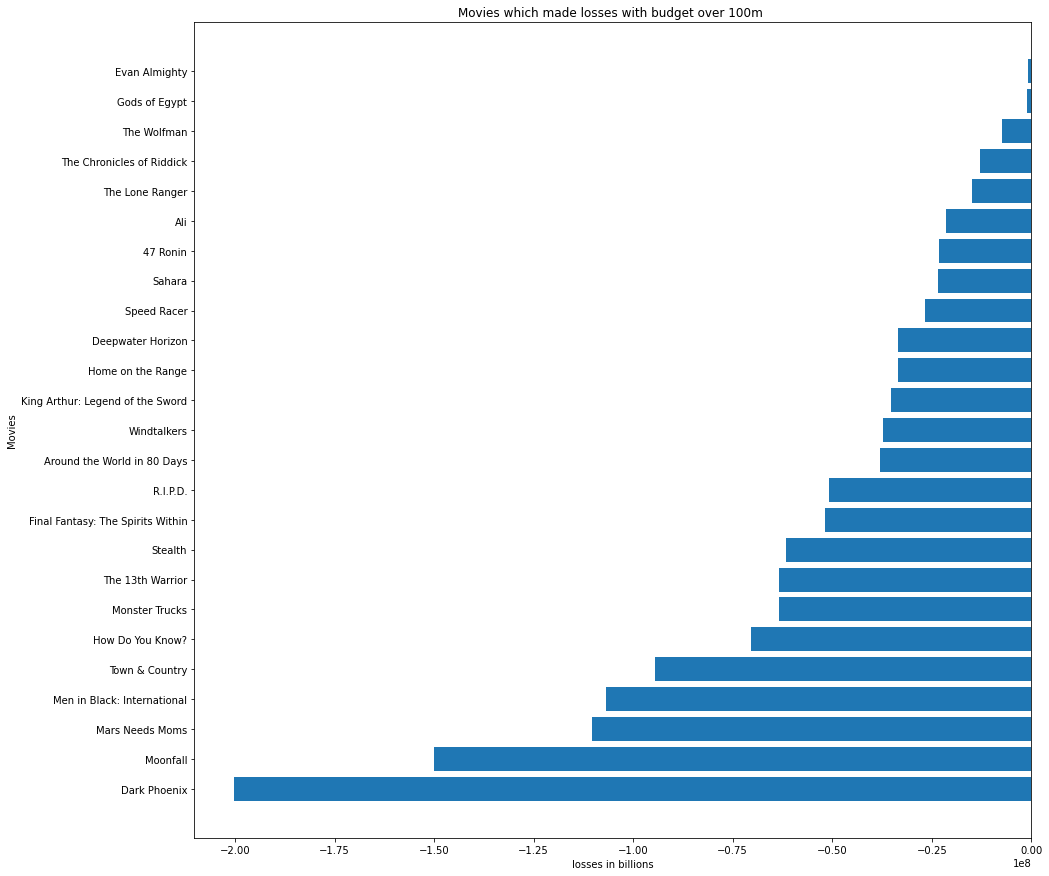

In [24]:
#plot a barchart to show which shows movies with budget of below 200m 
#Give a distribution of the figure size
plt.figure(figsize=(15,15))
#Give the plots to be used
plt.barh(below_budget['movie'], below_budget['profits'])

#Give the title, and labels of the axis
plt.title('Movies which made losses with budget over 100m ')
plt.xlabel('losses in billions')
plt.ylabel('Movies')
#To show the plot
plt.show()

In [ ]:
###
"The movie with the highest amount of losses was Dark Phoenix"
"Most movies in this category made a profit of above 200m"

In [25]:
#Movies with above 200m budget
above_budget = movie_budgets[movie_budgets['production_budget'] > 200000000].sort_values('profits', ascending = False)
above_budget 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,984846267
36,37,"Jun 27, 2014",Transformers: Age of Extinction,210000000,245439076,1104039076,894039076
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,890069413


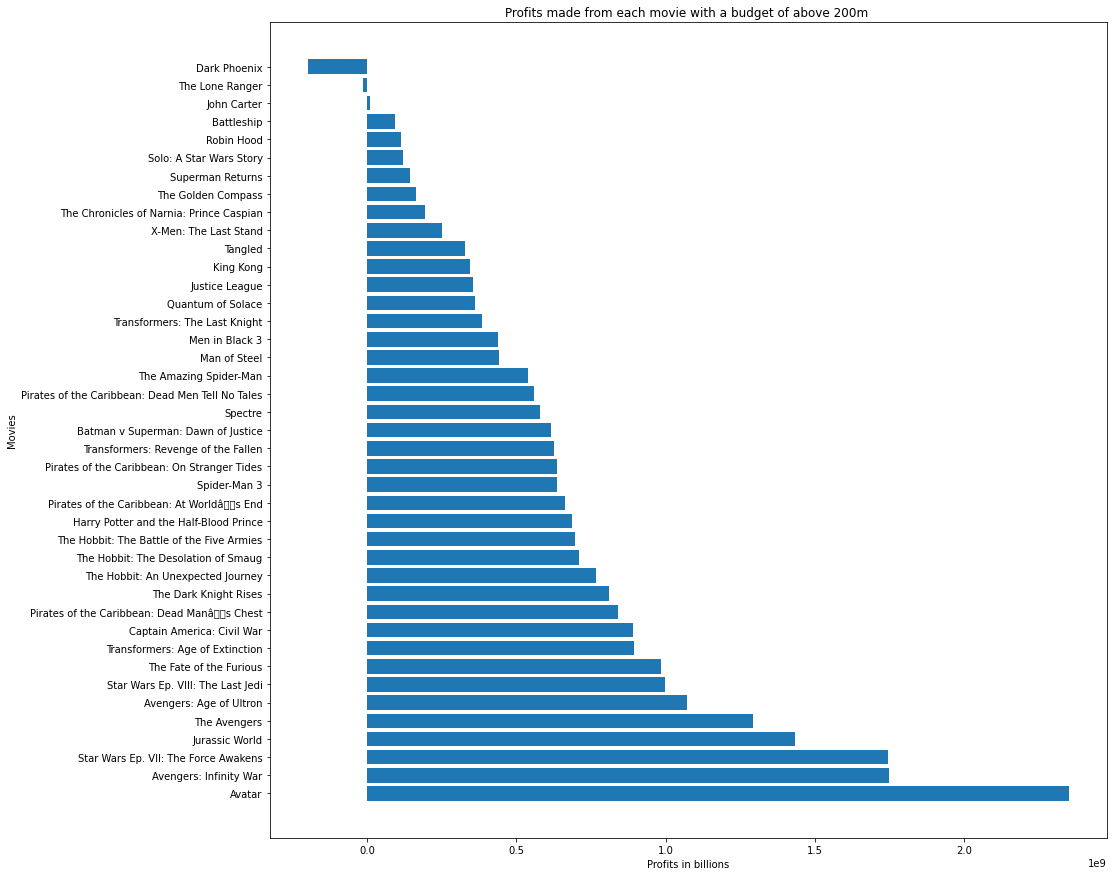

In [28]:
#plot a barchart to show which shows movies with budget of above 200m 
#Give a distribution of the figure size
plt.figure(figsize=(15,15))
#Give the plots to be used
plt.barh(above_budget['movie'], above_budget['profits'])

#Give the title, and labels of the axis
plt.title('Profits made from each movie with a budget of above 200m ')
plt.xlabel('Profits in billions')
plt.ylabel('Movies')
#To show the plot
plt.show()

In [83]:
###
"Only the movie Dark phoenix made a loss "
"The movie with the highest profit was Avatar"
"Most movies made a profit of above 600m"